##Introduction##
**Background**

In the rapidly evolving real estate market, accurate and timely predictions of property values are crucial for investors, realtors, and potential homeowners. King County, which includes Seattle, Washington, serves as an excellent case study due to its diverse housing stock and dynamic market conditions. The dataset obtained from Kaggle, originating from this region, encompasses a broad range of properties and offers a snapshot into the complexities of real estate valuation influenced by various factors.

**Objectives**

The primary objective of this report is to apply data mining techniques to understand and predict house prices in King County. This involves:

Exploratory Data Analysis (EDA):Conducting a comprehensive analysis to uncover patterns, anomalies, trends, and relationships within the data.

Predictive Modeling: Utilizing machine learning algorithms to develop a model that can accurately predict house prices based on multiple input features.

Evaluation: Assessing the performance of the predictive models to ensure their accuracy and reliability in real-world scenarios.

**Data Description**

The dataset consists of 21,597 observations and 18 attributes related to house features such as area, number of bedrooms, bathrooms, floors, and location coordinates, along with the house prices. Special attributes like 'Grade' and 'View' are indicative of qualitative assessments specific to King County's grading system and the number of times a property has been viewed, respectively. These features will be used to explore the influence of various factors on house pricing.

## Methodology
The analysis will be conducted through the following steps:

Data Preprocessing: Cleaning the data by handling missing values, outliers, and incorrect data types to prepare a robust dataset for analysis.

Feature Engineering: Enhancing the dataset with new features that could improve the model’s predictive power, such as interactions between existing features and polynomial features.

Model Development: Building regression models to predict house prices and employing techniques such as cross-validation and regularization to optimize model performance.

In [1]:
!pip install category_encoders

## Get data sample ##

**Data Importation**

The initial phase of our analysis involved importing essential Python libraries that are foundational for data manipulation, visualization, and analysis. These libraries include Pandas for data handling, NumPy for numerical operations, Matplotlib and Seaborn for data visualization, and category_encoders for managing categorical variables effectively.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OneHotEncoder
%matplotlib inline

**Get data sample**

Following the setup of our analytical environment, we proceeded to load the dataset titled ST83519_kc_house_data_.csv into a pandas DataFrame. This dataset comprises detailed records of house sales in King County, including Seattle, which is known for its dynamic real estate market. The comprehensive dataset, sourced from Kaggle under a public domain license, includes 21,519 observations and 18 attributes, providing a robust foundation for our predictive modeling endeavors.

In [3]:
data = pd.read_csv('/content/ST83519_kc_house_data_.csv')

**Initial Data Examination**

Using the head() function, we examined the first few entries of the dataset to understand the structure and the type of data each column holds. This preliminary peek revealed several key attributes such as price, bedrooms, bathrooms, sqft_living, and sqft_lot, among others, which are integral to house valuation. Notably, the dataset includes both numerical and categorical data, such as waterfront and grade, which necessitate appropriate preprocessing to convert them into a machine-readable format.

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503



### Data Structure Overview and Preliminary Data Assessment

The dataset comprises 21,597 records, each detailed with 18 attributes that encapsulate various aspects of housing in King County, including size, condition, and pricing attributes. A comprehensive review using pandas' info() function indicates a well-structured dataset with complete data across all fields—there are no missing values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

### Get Descriptive Statistic and Transpose them

In [6]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.0,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.370000e+00,9.300000e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.120000e+00,7.700000e-01,0.5,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080320e+03,9.181100e+02,370.0,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.0,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.490000e+00,5.400000e-01,1.0,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,1.000000e-02,9.000000e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.300000e-01,7.700000e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.410000e+00,6.500000e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Inspect each column

In [7]:
for val in data:
    print(data[val].value_counts())
    print()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

date
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
11/2/2014      1
1/31/2015      1
5/24/2015      1
5/17/2014      1
7/27/2014      1
Name: count, Length: 372, dtype: int64

price
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: count, Length: 3622, dtype: int64

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.0

### House Price Distribution

<ipython-input-8-b6a921110895>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


Text(0.5, 1.0, 'House Price Distribution')

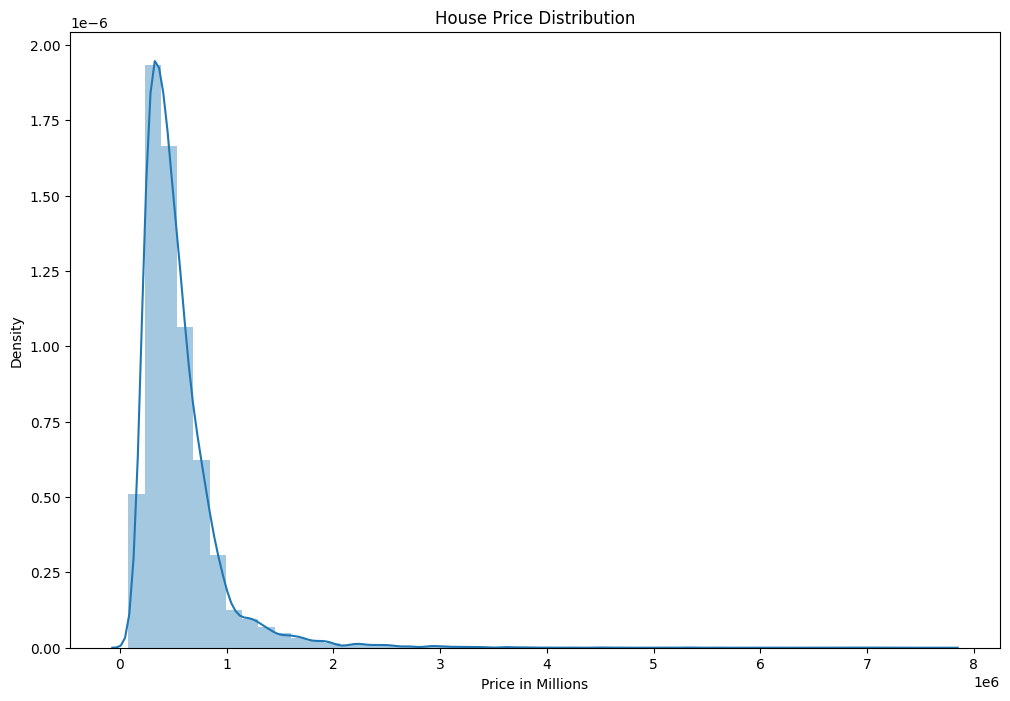

In [8]:
plt.figure(figsize=(12, 8))
sns.distplot(data['price'])
plt.xlabel('Price in Millions')
plt.title('House Price Distribution')

### Living Space Distribution

<ipython-input-9-56ea2dfe4dcb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sqft_living'])


Text(0.5, 1.0, 'House sqft_living Distribution')

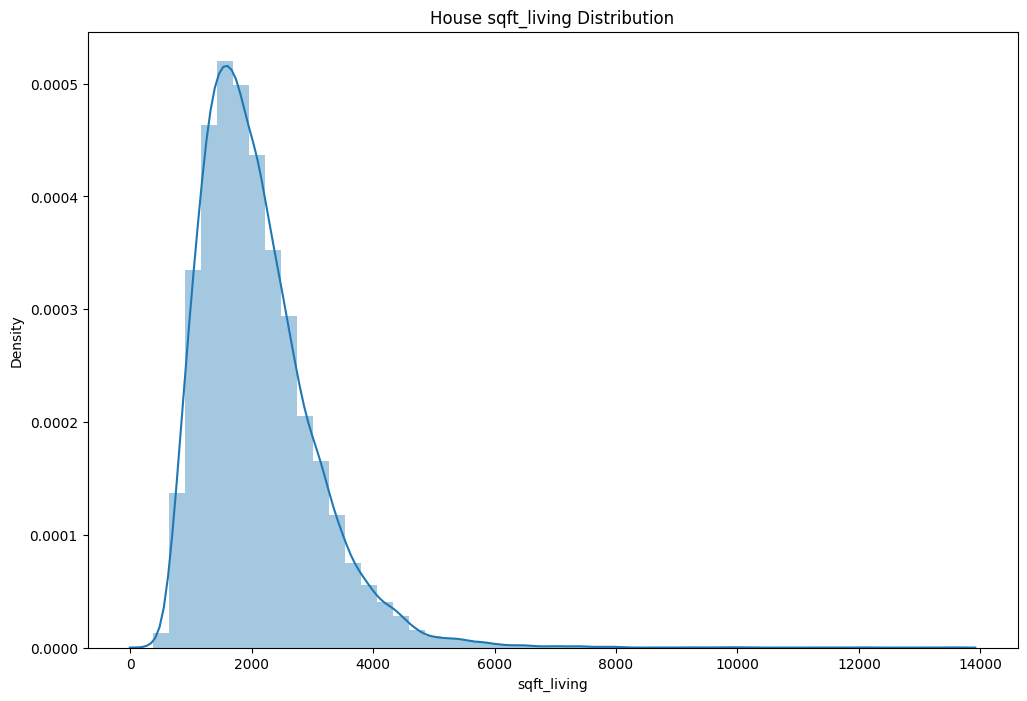

In [9]:
plt.figure(figsize=(12, 8))
sns.distplot(data['sqft_living'])
plt.title('House sqft_living Distribution')

### Bedrooms

<ipython-input-10-82bcbed943f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms',data=data, palette='Set2')


Text(0.5, 1.0, 'House bedrooms Distribution')

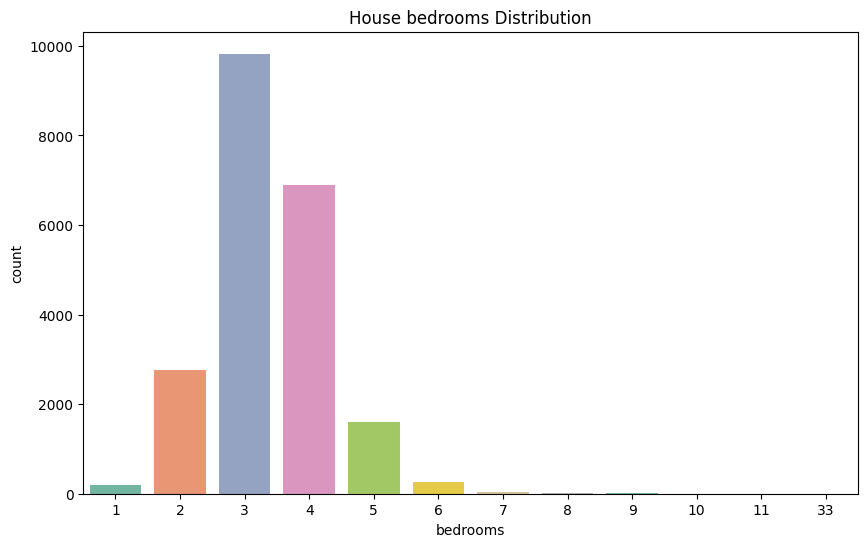

In [10]:
plt.figure(figsize = (10,6))
sns.countplot(x='bedrooms',data=data, palette='Set2')
plt.title('House bedrooms Distribution')

<ipython-input-11-72a8e184bfc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=data, palette='Set2')


<Axes: xlabel='bedrooms', ylabel='price'>

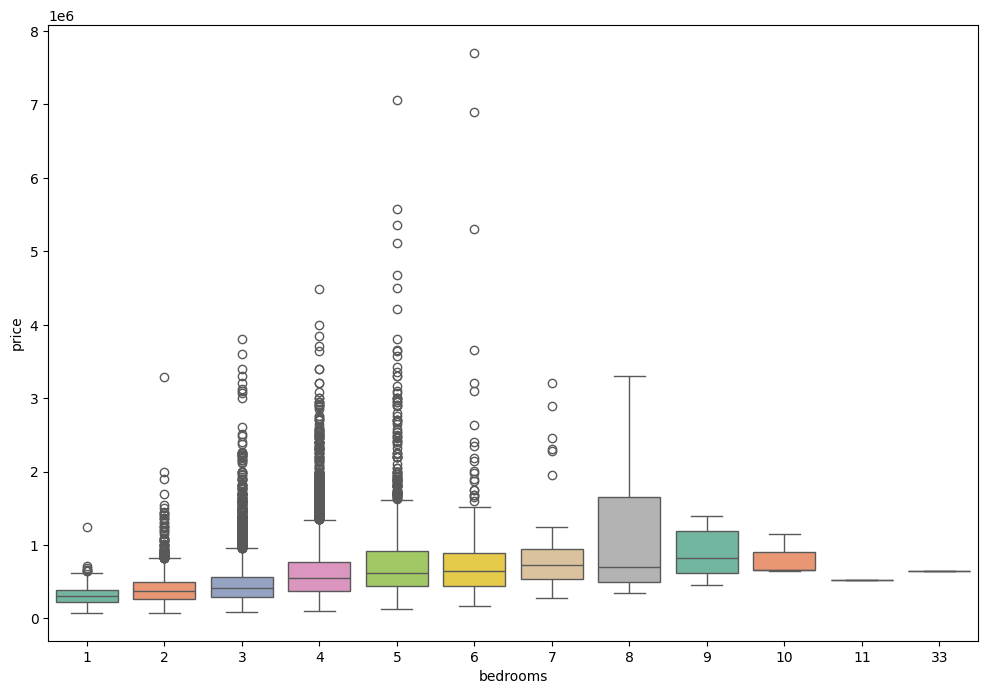

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='bedrooms', y='price', data=data, palette='Set2')

<ipython-input-12-1999c91c2d25>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bathrooms',data=data, palette='Set2')


Text(0.5, 1.0, 'House bathrooms Distribution')

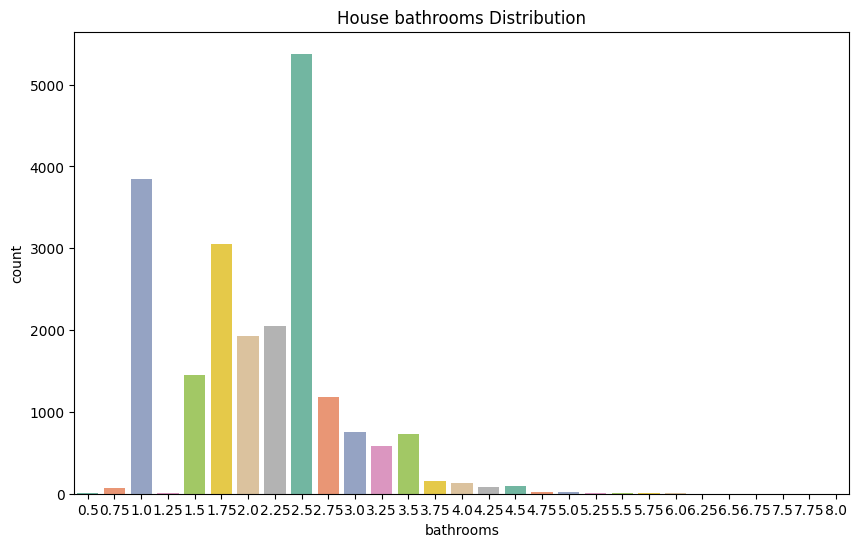

In [12]:
plt.figure(figsize = (10,6))
sns.countplot(x='bathrooms',data=data, palette='Set2')
plt.title('House bathrooms Distribution')

<ipython-input-13-c948d134ad5c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bathrooms', y='price', data=data, palette='Set2')


<Axes: xlabel='bathrooms', ylabel='price'>

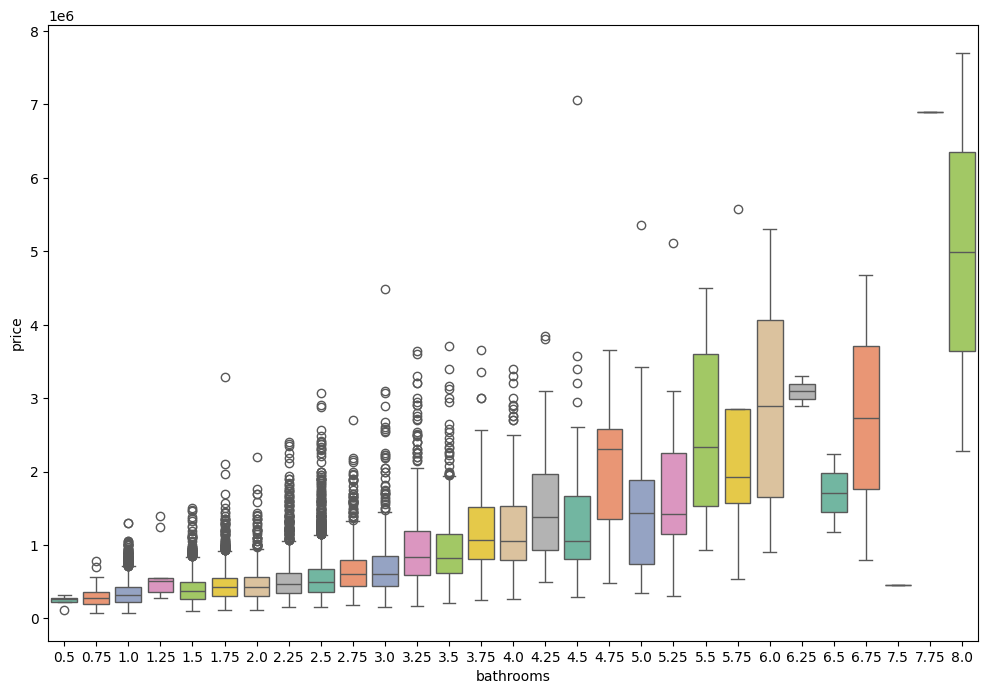

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='bathrooms', y='price', data=data, palette='Set2')

### Grade

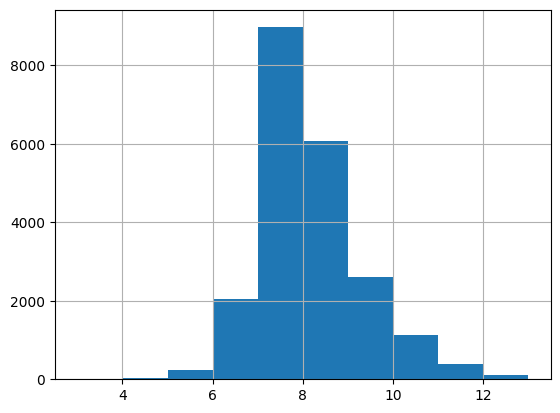

In [14]:
import pylab as P
data['grade'].hist()
P.show()

<ipython-input-15-bf3ad47baf72>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.boxplot(x='grade', y='price', data=data, palette='Set2')


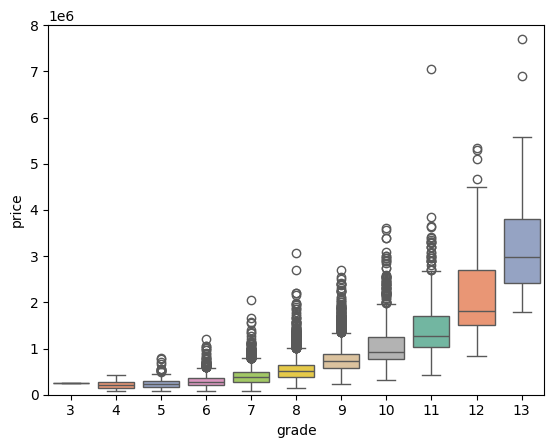

In [15]:
fig = sns.boxplot(x='grade', y='price', data=data, palette='Set2')
fig.axis(ymin=0, ymax=8000000);

### Year Built

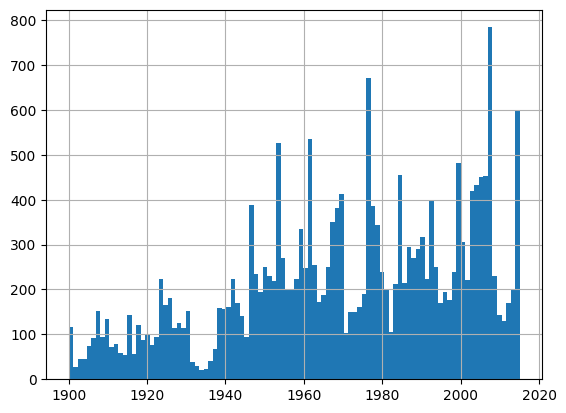

In [16]:
data['yr_built'].hist(bins = 100)
P.show()

### Enhancement of Dataset through Feature Engineering

The dataset underwent significant transformation to refine its utility for predictive modeling, focusing on the creation of new features that capture more nuanced aspects of the housing data. Initially, the id column, deemed unnecessary for analysis, was removed to streamline the dataset. Subsequently, the date field was manipulated to extract the sales_year, which provides a discrete measure of time, pivotal for any time-series analysis.

To deepen the dataset's analytical value, two new features, age_of_building and years_from_ren, were introduced. age_of_building is calculated by subtracting the construction year (yr_built) from the sales year, offering insights into the potential depreciation or appreciation of property value over time. The years_from_ren feature, initialized to zero and updated for properties with renovations (yr_renovated > 0), reflects the time elapsed since the last renovation, which could influence the property's market value.

The creation of these features required the removal of the original yr_built and yr_renovated columns post-calculation to avoid redundancy and potential multicollinearity in subsequent modeling. This refinement of the dataset not only aids in a more accurate evaluation of factors affecting house prices but also ensures the model's robustness by providing clearer, more direct variables for analysis.

In [17]:
data.drop(['id'], axis=1, inplace = True)

In [18]:
df = data['date'].apply(lambda x: x.split('/')[2])

In [19]:
data.insert(1,"sales_year",df)

In [20]:
data.drop(['date'],axis=1, inplace=True)

In [21]:
data['sales_year']=data['sales_year'].astype('int')

In [22]:
# Creating a new column 'age_of_building' in the DataFrame 'data'
# This column calculates the age of each building at the time of its sale
# by subtracting the year the building was constructed ('yr_built') from the year of sale ('sales_year')
data['age_of_building'] = data['sales_year'] - data['yr_built']

In [23]:
# Initialize a new column 'years_from_ren' in the DataFrame 'data' with all values set to zero
data['years_from_ren']=0

# Update 'years_from_ren' only for properties that have been renovated (yr_renovated > 0)
# Calculate the number of years from the renovation year to the sales year
data.loc[data['yr_renovated']>0,'years_from_ren'] = data['sales_year']-data['yr_renovated']

In [24]:
# Remove the columns 'yr_built' and 'yr_renovated' from the DataFrame 'data'
data.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sales_year       21597 non-null  int64  
 1   price            21597 non-null  float64
 2   bedrooms         21597 non-null  int64  
 3   bathrooms        21597 non-null  float64
 4   sqft_living      21597 non-null  int64  
 5   sqft_lot         21597 non-null  int64  
 6   floors           21597 non-null  float64
 7   waterfront       21597 non-null  int64  
 8   view             21597 non-null  int64  
 9   condition        21597 non-null  int64  
 10  grade            21597 non-null  int64  
 11  sqft_above       21597 non-null  int64  
 12  sqft_basement    21597 non-null  int64  
 13  sqft_living15    21597 non-null  int64  
 14  sqft_lot15       21597 non-null  int64  
 15  age_of_building  21597 non-null  int64  
 16  years_from_ren   21597 non-null  int64  
dtypes: float64(3

#### Define categorical and numerical variables ###

**Data Segmentation and Preliminary Analysis**

In the preprocessing phase, a deliberate division of the dataset was implemented to separate categorical and numerical variables, facilitating specialized handling and analysis for each data type.

*Categorical Data Preparation*

A new DataFrame was constructed specifically for categorical variables, namely waterfront, view, and condition. This separation is foundational for forthcoming tasks such as specific categorical data analyses and necessary transformations like encoding, which are vital for the accurate inclusion of these variables in predictive modeling.

*Numerical Data Analysis*

Conversely, another DataFrame was exclusively dedicated to numerical variables—those identified by data types **int64** and **float64**. This setup allows for a focused descriptive analysis using the **describe()** function, which provides essential statistical summaries for these variables. The descriptive output was rounded to minimize decimal places for clarity and transposed to facilitate a more intuitive evaluation of each variable’s statistical characteristics.


In [26]:
# Convert the 'waterfront' column to object type to treat it as categorical data
data['waterfront'] = data['waterfront'].astype('object')

# Convert the 'condition' column to object type to treat it as categorical data
data['condition'] = data['condition'].astype('object')

# Convert the 'view' column to object type to treat it as categorical data
data['view'] = data['view'].astype('object')

In [27]:
# Count the occurrences of each unique value in the 'view' column
data['view'].value_counts()

view
0    19475
2      961
3      510
1      332
4      319
Name: count, dtype: int64

In [28]:
# Count the occurrences of each unique value in the 'condition' column, noting that smaller groups might be merged or lost
data['condition'].value_counts()

condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64

In [29]:
data['waterfront'].value_counts()

waterfront
0    21434
1      163
Name: count, dtype: int64

In [30]:
# Define a list 'cat' to identify columns in 'data' as categorical variables for further processing
cat = ['view', 'condition', 'waterfront',]

In [31]:
data_cat = data[cat]

In [32]:
data_num = data.select_dtypes(include=['int64','float64'])

### Get descriptive statistic

In [33]:
# Generate descriptive statistics for numeric data, round to 2 decimals, and transpose for better readability
# Since the data scale varies significantly and there are potential outliers, further scaling and outlier handling are needed
data_num.describe().round(2).T  # We need to rescale and potentially remove outliers, especially in 'price' and 'sqft_lot'

,count,mean,std,min,25%,50%,75%,max
sales_year,21597.0,2014.32,0.47,2014.0,2014.00,2014.00,2015.0,2015.0
price,21597.0,540296.57,367368.14,78000.0,322000.00,450000.00,645000.0,7700000.0
bedrooms,21597.0,3.37,0.93,1.0,3.00,3.00,4.0,33.0
bathrooms,21597.0,2.12,0.77,0.5,1.75,2.25,2.5,8.0
sqft_living,21597.0,2080.32,918.11,370.0,1430.00,1910.00,2550.0,13540.0
sqft_lot,21597.0,15099.41,41412.64,520.0,5040.00,7618.00,10685.0,1651359.0
floors,21597.0,1.49,0.54,1.0,1.00,1.50,2.0,3.5
grade,21597.0,7.66,1.17,3.0,7.00,7.00,8.0,13.0
sqft_above,21597.0,1788.60,827.76,370.0,1190.00,1560.00,2210.0,9410.0
sqft_basement,21597.0,291.73,442.67,0.0,0.00,0.00,560.0,4820.0


### Comprehensive Analysis of Numerical Variables in the Dataset ###

The dataset showcases a diverse array of variables, highlighting the multifaceted nature of property characteristics within King County. These variables range widely in both type and scale, from quantitative measurements such as square footage (sqft_living, sqft_lot) to counts of rooms (bedrooms, bathrooms). This diversity is crucial for constructing a nuanced understanding of real estate valuation but also poses challenges in data handling and model construction.

**Price Variability and Scale Discrepancies**

The price variable, central to our analysis, has an average value of approximately **540,000** USD, with a broad range extending from **78,000** USD to **7.7** USD million. This substantial variability underscores the heterogeneity of the housing market, reflecting everything from modest homes to luxury estates. Similarly, the sqft_lot size varies dramatically, from as little as 520 square feet to over 1.65 million square feet, suggesting a range from small urban plots to vast rural lands. Such extreme values, particularly evident in the upper ranges of price and sqft_lot, indicate the presence of outliers that could skew further analysis and predictive modeling. The disproportionate maximum values, especially in sqft_lot as compared to its 75%, highlight the necessity for careful outlier management.

**Data Consistency and Integrity Issues**

Further complicating our analysis are anomalies such as negative values in age_of_building and years_from_ren, which logically suggest data entry errors since negative ages are not feasible. These issues need addressing to ensure the integrity of subsequent analyses.

**Descriptive Statistics and Data Normalization**

The statistical overview provided by the describe() function reinforces these observations, showing not only the central tendencies and dispersions but also the inconsistencies in measurement scales across different variables. Some variables are measured in hundreds or thousands, while others range **from 0 to 10**. This disparity necessitates the normalization or standardization of data to ensure uniformity in measurements, which is critical for effective statistical analysis and machine learning applications.

The descriptive statistics also further detail the price distribution, where the median value stands at 645,000 USD, reaffirming the significant spread and variability in housing prices across the dataset.


In [34]:
# quantile 0.9
# Calculate the 90th percentile for each numeric column in data_num to identify upper thresholds
Q90 = data_num.quantile(0.9)

In [35]:
# Transpose the 90th percentile values to examine and confirm the presence of outliers across columns
Q90.T  # We confirm that outliers exist and plan to remove them later.

sales_year           2015.0
price              887000.0
bedrooms                4.0
bathrooms               3.0
sqft_living          3254.0
sqft_lot            21371.6
floors                  2.0
grade                   9.0
sqft_above           2950.0
sqft_basement         970.0
sqft_living15        2930.0
sqft_lot15          17822.0
age_of_building        89.0
years_from_ren          0.0
Name: 0.9, dtype: float64

In [36]:
# Generate descriptive statistics for categorical data and transpose the result for easier analysis
data_cat.describe().T

,count,unique,top,freq
view,21597,5,0,19475
condition,21597,5,3,14020
waterfront,21597,2,0,21434


### Outlier Analysis and Categorical Data Description ###

*Outlier Identification Using Percentiles*

To ensure the robustness and accuracy of the statistical models, identifying and handling outliers in the numerical data is crucial. The analysis involved calculating the 90% for each numerical variable as a method to define upper thresholds and identify extreme values. The values at the 90th percentile provide a reference point, beyond which data points may be considered outliers:

**Price**: The 90th percentile is approximately 887,000 USD, suggesting that most homes are valued below this threshold, and values above it could be considered outliers in certain analyses.

**Square Footag**e: For living area (sqft_living), the 90th percentile is 3,254 sq ft, indicating large homes but not excessively so. For lot size (sqft_lot), the threshold is around 21,371 sq ft, highlighting substantial property sizes that may need special consideration due to their impact on the model.

**Rooms**: Bedrooms and bathrooms have thresholds at 4 and 3 respectively, which are typical for larger family homes.
These thresholds will guide the process of outlier management, where entries exceeding these values might be removed or treated differently to prevent them from skewing the analysis.

*Categorical Data Statistical Summary*

The transposed descriptive statistics for categorical data — specifically view, condition, and waterfront — illuminate the distribution and frequency of categories:

**View**: Most properties (19,475 out of 21,597) have not been viewed, which could influence their market perception and eventual pricing.

**Condition**: A majority of properties are in "average" condition (rating 3), with 14,020 instances, suggesting that most properties do not require significant immediate investment in repairs or upgrades.

**Waterfront**: A significant majority of the properties (21,434 out of 21,597) do not have waterfront access, making waterfront properties highly unique and potentially more valuable.




##Exploratory Data Analysis

In [37]:
# Set the color palette to a gradient of green and blue for all seaborn plots
sns.set_palette("GnBu_d")

# Apply a white grid background to all seaborn plots for better readability
sns.set_style('whitegrid')

### Data visualisation to detect the possable relationships, form and outliers

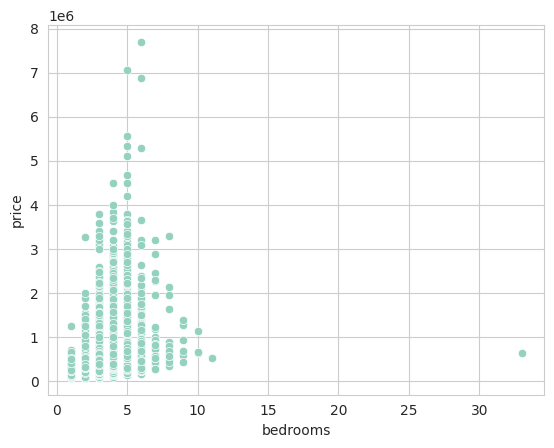

In [38]:
sns.scatterplot(x = 'bedrooms', y = 'price', data = data);


In the scatter plot examining the relationship between the number of bedrooms and house prices, most data points cluster for houses with 2 to 10 bedrooms, with prices generally under 2 million USD. There are outliers, particularly for homes with more than 10 bedrooms, which might not accurately reflect typical market values and could influence statistical models inappropriately.

Specifically, the presence of a house with around 30 bedrooms priced much lower than others is unusual and might be an error. Such outliers could distort a linear regression model, which assumes a linear relationship and is sensitive to extreme values.


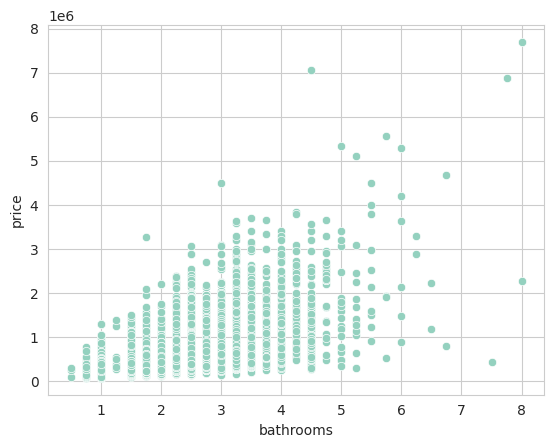

In [39]:
sns.scatterplot(x = 'bathrooms', y = 'price', data = data);

The scatter plot illustrates the relationship between the number of bathrooms in a house and its price. Most homes, featuring 1 to 4 bathrooms, are priced under 3 million USD. As the number of bathrooms increases, there's a notable rise in price, suggesting a positive correlation.

However, we observe several outliers, especially at higher bathroom counts where fewer data points exist, and prices reach up to 8 million USD. These extreme values could affect predictive modeling such as linear regression, leading to skewed results.

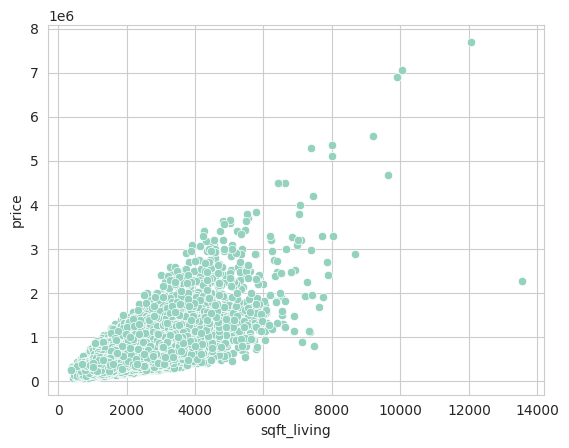

In [40]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = data);

The scatter plot depicting the relationship between living area size (in square feet) and house price shows that as the living area increases, there is a general trend of rising house prices. The dense clustering of homes with 1,000 to 4,000 square feet aligns with prices ranging from under 1 million USD to around 3 million USD, indicating this is the common market range.

However, there are noticeable outliers, particularly homes with large living areas (above 10,000 square feet) where the prices also escalate significantly, some reaching as high as 8 million USD. These outliers could influence the outcomes of linear regression models due to their leverage on the regression line.

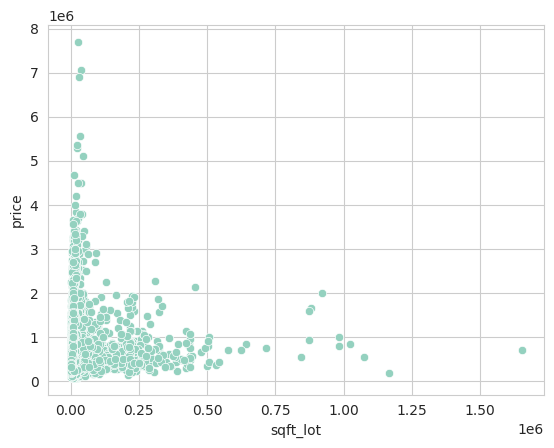

In [41]:
sns.scatterplot(x = 'sqft_lot', y = 'price', data = data);

The scatter plot illustrates the relationship between lot size (in square feet) and house prices. Data is concentrated mainly at lot sizes under 0.25 million square feet and house prices below 3 million USD. This clustering suggests that in this range, lot size doesn't significantly impact house prices.

However, there are outliers with much larger lot sizes that don't necessarily correlate with higher house prices. In fact, some of these properties with expansive lots are priced lower than expected, suggesting that other variables besides lot size play a greater role in price determination at these outlier points.

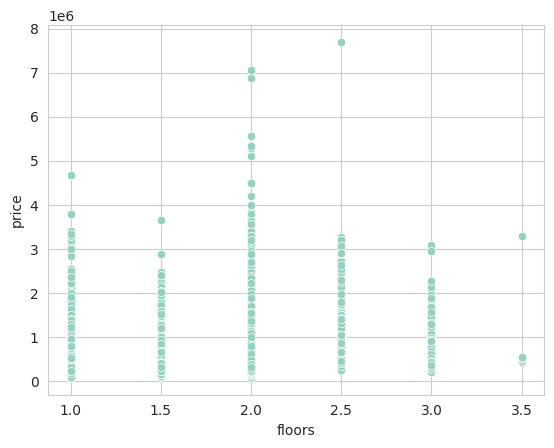

In [42]:
sns.scatterplot(x = 'floors', y = 'price', data = data);

The scatter plot shows that houses with 1 to 2 floors are the most common, with prices mostly under 2 million USD. As the number of floors increases to 3 or more, house prices also tend to increase, indicating that more floors often mean a higher property value. However, there are wide price ranges within each floor category, suggesting that while the number of floors is important, other factors also play a significant role in determining house prices. Some outliers with very high prices, especially for houses with 3 or more floors.

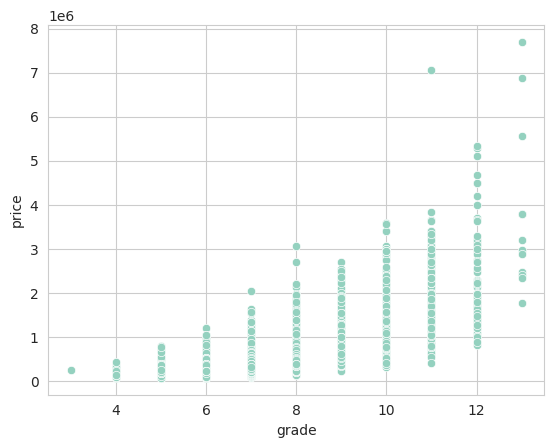

In [43]:
sns.scatterplot(x = 'grade', y = 'price', data = data);

The scatter plot illustrates the relationship between house grades and their prices. There is a clear upward trend, showing that as the grade of a house increases, the price generally rises. Houses with grades between 7 and 13 dominate the market, with prices clustering between 1 million USD and 3 million USD. Higher-grade houses, especially those graded above 10, tend to have significantly higher prices, reaching up to $8 million. This positive correlation suggests that the grade of a house, which likely reflects its quality and amenities, is a strong predictor of its market value. Outliers with exceptionally high prices at high grades should be further examined to ensure data accuracy and consistency. Overall, house grade is a crucial factor in determining price and should be included as a key variable in predictive models.

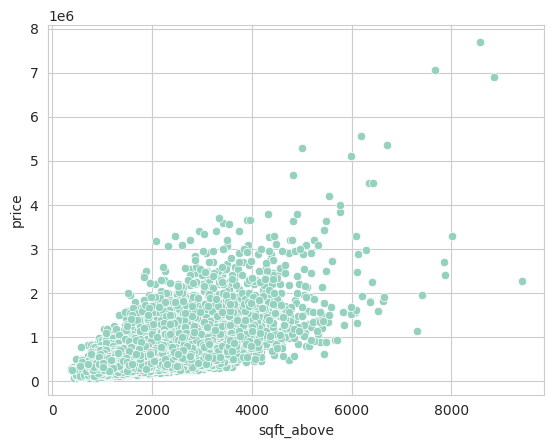

In [44]:
sns.scatterplot(x = 'sqft_above', y = 'price',data = data);


The scatter plot shows that as the above-ground living area increases, house prices generally rise. Most homes have between 1,000 and 4,000 square feet above ground, with prices mostly below 2 million USD. There are some outliers with larger areas, up to 8,000 square feet, and prices reaching 8 million USD. These outliers need to be reviewed as they can impact the analysis. The positive correlation between above-ground living space and price indicates that larger homes tend to be more expensive. This variable is crucial for predicting house prices accurately.

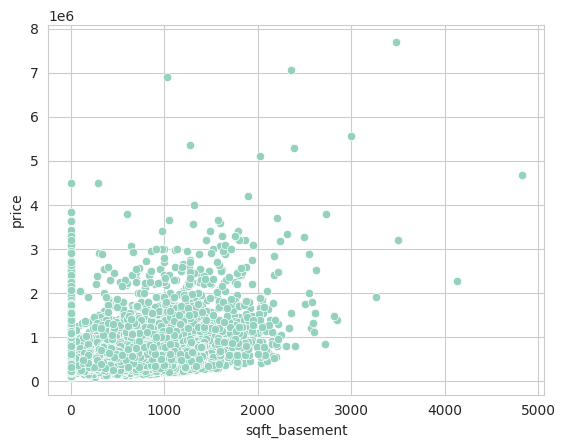

In [45]:
sns.scatterplot(x = 'sqft_basement', y = 'price', data = data);

The scatter plot illustrates the relationship between basement square footage and house prices. Most homes have basements up to 2,000 square feet, with prices generally under 2 million USD. There are outliers with larger basements, reaching up to 5,000 square feet, and prices as high as 8 million USD. These outliers should be reviewed as they can skew the analysis. While there is some correlation between larger basements and higher prices, it is not as strong as with above-ground living space.

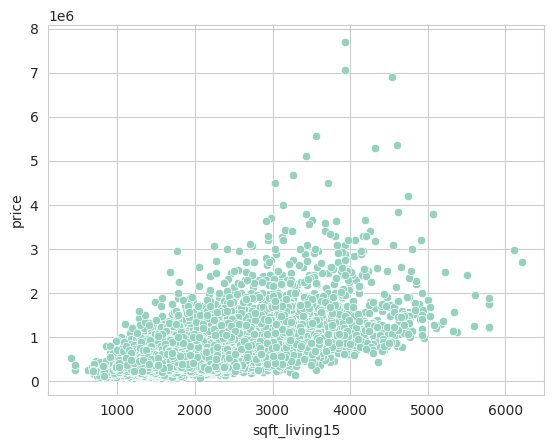

In [46]:
sns.scatterplot(x = 'sqft_living15', y = 'price', data = data);

The scatter plot depicts the relationship between the recent living area (sqft_living15) and house prices. There is a clear positive correlation, showing that as the living area increases, the price generally rises. Most houses have a living area between 1,000 and 4,000 square feet, with prices clustering below 2 million USD. There are some outliers with larger living areas and higher prices, reaching up to 8 million USD. These outliers can significantly impact the analysis and should be reviewed for accuracy. The positive trend indicates that sqft_living15 is an important factor in determining house prices and should be included in predictive models for better accuracy.

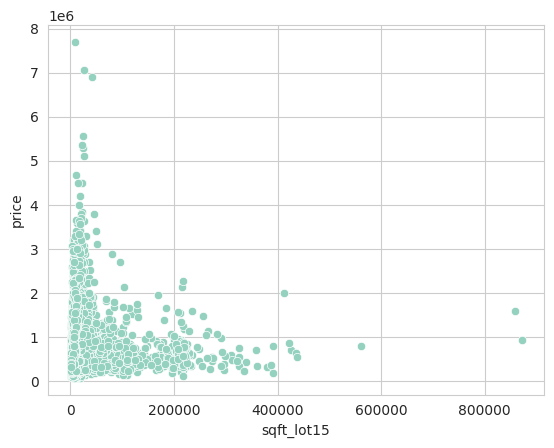

In [47]:
sns.scatterplot(x = 'sqft_lot15', y = 'price', data = data);

The scatter plot shows the relationship between lot size (sqft_lot15) and house prices. Most houses have lot sizes under 200,000 square feet, with prices generally below 2 million USD. There is a clustering of data points in this range, indicating that larger lot sizes do not necessarily correspond to higher prices. Some outliers have very large lot sizes and higher prices, reaching up to 8 million USD, which should be reviewed for accuracy as they can affect the analysis. The lack of a strong correlation between lot size and price suggests that other factors may play a more significant role in determining house prices.

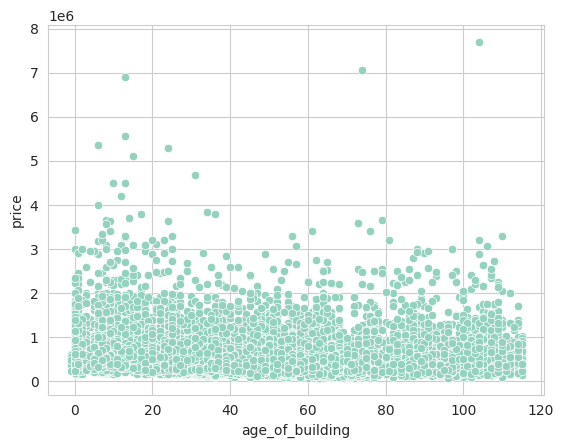

In [48]:
sns.scatterplot(x = 'age_of_building', y = 'price', data = data);


The scatter plot shows the relationship between the age of buildings and house prices. The data indicates that house prices do not strongly correlate with the age of the building. Most house prices, regardless of age, cluster below 2 million USD. There are some outliers, especially with very high prices, but these are not concentrated in any specific age range.

The lack of a strong trend suggests that the age of a building is not a primary factor in determining house prices. However, the outliers with exceptionally high prices should be reviewed for accuracy as they can affect the overall analysis. Including the age of the building as a variable in predictive models can still be useful, but it should be considered alongside other more influential factors.

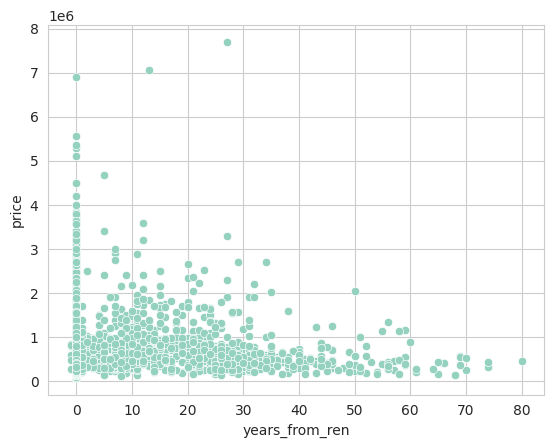

In [49]:
sns.scatterplot(x = 'years_from_ren', y = 'price', data = data);

The scatter plot illustrates the relationship between the number of years since a house was last renovated (years_from_ren) and its price. The plot shows that houses renovated more recently tend to have higher prices, with a clustering of prices below 2 million USD for homes renovated in the last 20 years. There are several outliers with high prices, particularly for homes renovated within the last 5 years, reaching up to 8 million USD.

As the number of years since renovation increases, house prices generally decrease, and there are fewer high-price outliers. This trend suggests that recent renovations positively impact house prices. Therefore, years_from_ren is an important variable to include in predictive models for better accuracy in estimating house prices.

### Cleaning from outliers

In [50]:
data_num.columns

Index(['sales_year', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'age_of_building', 'years_from_ren'],
      dtype='object')

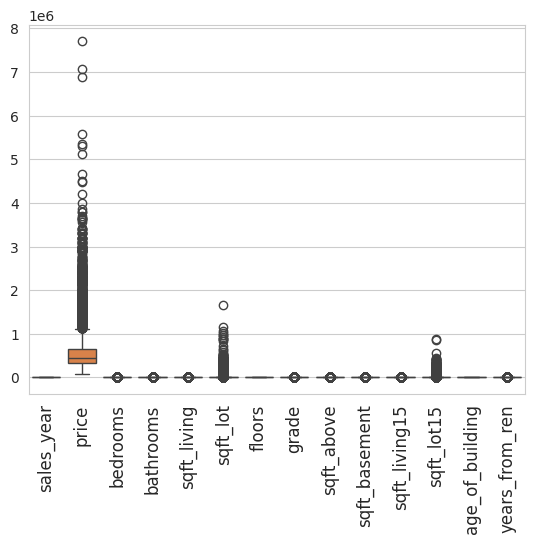

In [51]:
sns.boxplot(data_num)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [52]:
q=data_num.quantile(0.90)
q

sales_year           2015.0
price              887000.0
bedrooms                4.0
bathrooms               3.0
sqft_living          3254.0
sqft_lot            21371.6
floors                  2.0
grade                   9.0
sqft_above           2950.0
sqft_basement         970.0
sqft_living15        2930.0
sqft_lot15          17822.0
age_of_building        89.0
years_from_ren          0.0
Name: 0.9, dtype: float64

In [53]:
data_cleaned = data

In [54]:
num_col = data_num.columns

In [55]:
data_cleaned = data_cleaned[data_cleaned['price']<q['price']]

In [56]:
data_cleaned.head()

,sales_year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age_of_building,years_from_ren
0,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,23
2,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


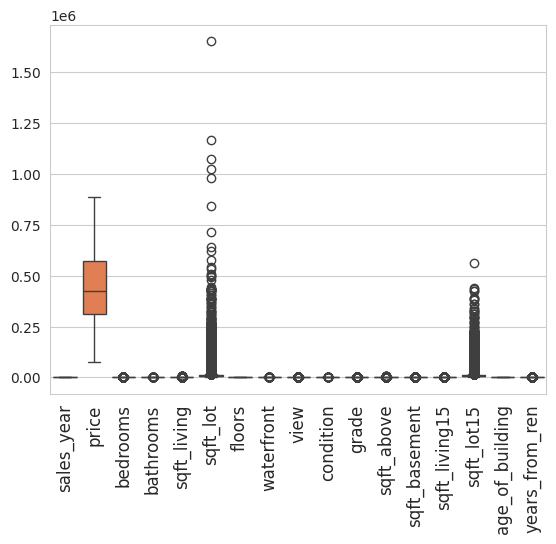

In [57]:
sns.boxplot(data_cleaned)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [58]:
q=data_num.quantile(0.90)
q

sales_year           2015.0
price              887000.0
bedrooms                4.0
bathrooms               3.0
sqft_living          3254.0
sqft_lot            21371.6
floors                  2.0
grade                   9.0
sqft_above           2950.0
sqft_basement         970.0
sqft_living15        2930.0
sqft_lot15          17822.0
age_of_building        89.0
years_from_ren          0.0
Name: 0.9, dtype: float64

In [59]:
data_cleaned = data_cleaned[data_cleaned['sqft_lot']<q['sqft_lot']]

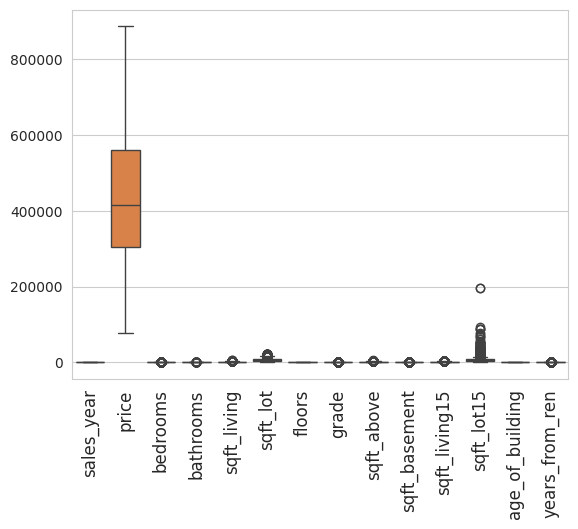

In [60]:
sns.boxplot(data_cleaned[num_col])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [61]:
data_cleaned = data_cleaned[data_cleaned['sqft_lot15']<q['sqft_lot15']]

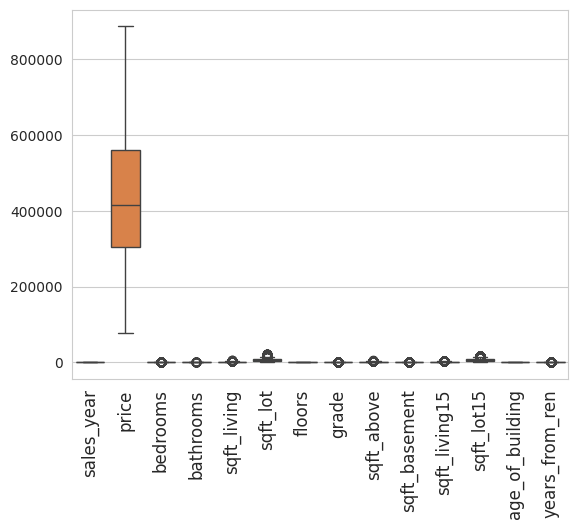

In [62]:
sns.boxplot(data_cleaned[num_col])
plt.xticks(rotation=90, fontsize=12)
plt.show()

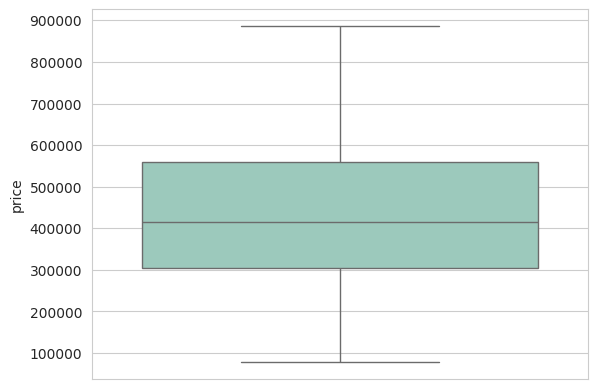

In [63]:
sns.boxplot(data=data_cleaned['price']);

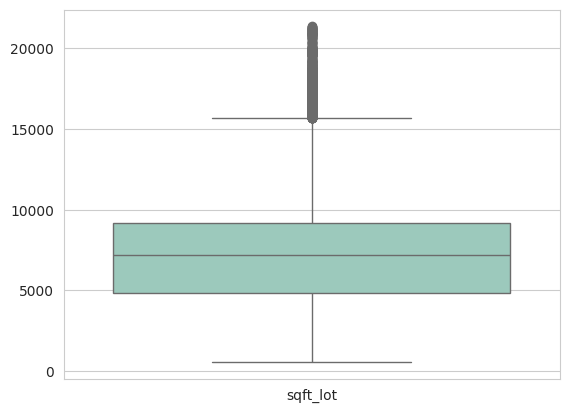

In [64]:
sns.boxplot(data=data_cleaned[['sqft_lot']]);

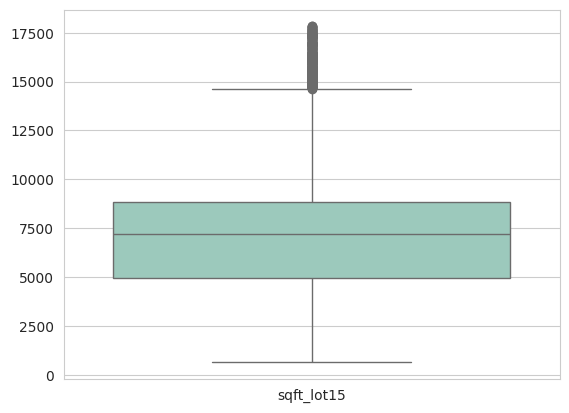

In [65]:
sns.boxplot(data=data_cleaned[['sqft_lot15']]);

### Get correlation matrix

In [66]:
data_num = data_cleaned[num_col]

<Axes: >

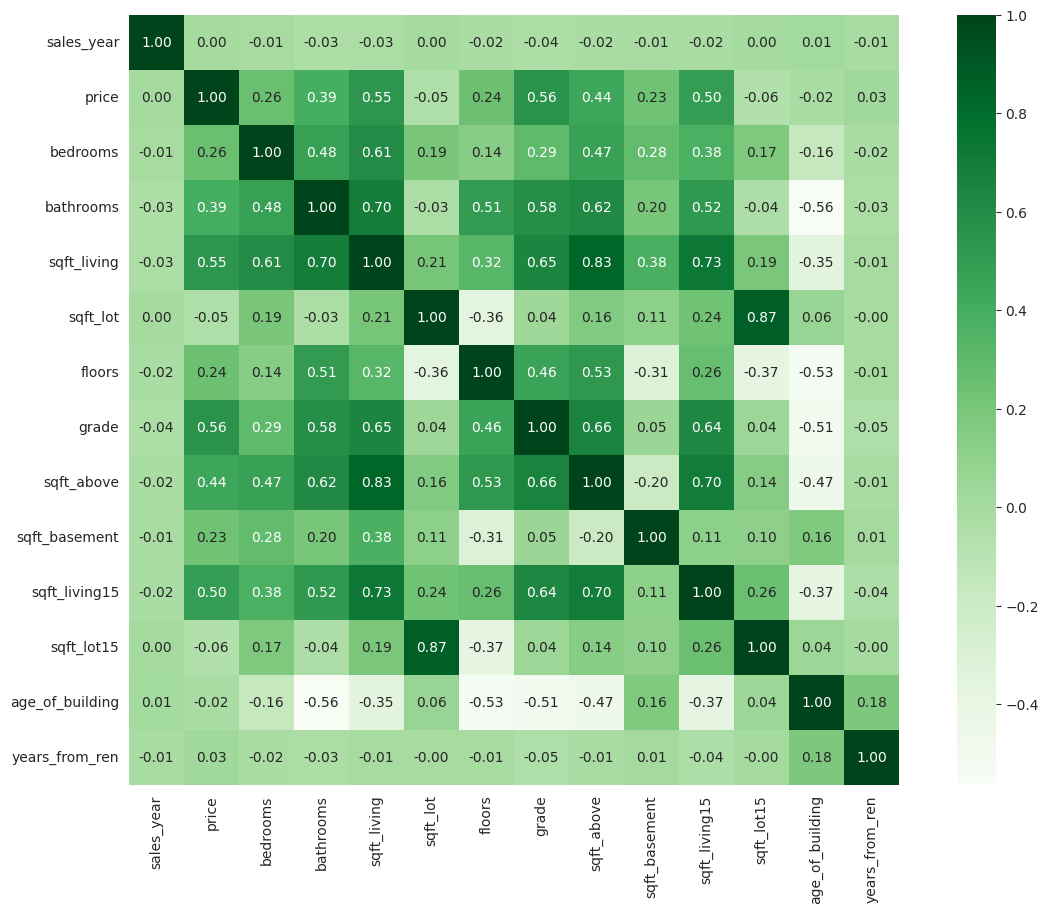

In [67]:
# # Plotting the heatmap of correlation between features
from typing import ChainMap
CM = data_num.corr()
plt.figure(figsize=(15,10))
sns.heatmap(CM,  cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [68]:
data_cat.columns

Index(['view', 'condition', 'waterfront'], dtype='object')

In [69]:
V = pd.get_dummies(data_cleaned['view'], drop_first=False)
for i in range(len(V.columns)):
 V.rename(columns={V.columns[i]:'View'+ str(i)}, inplace=True)

C = pd.get_dummies(data_cleaned['condition'], drop_first=False)
for i in range(len(C.columns)):
  C.rename(columns={C.columns[i]:'Condition'+str(i)}, inplace=True)

W = pd.get_dummies(data_cleaned['waterfront'], drop_first = False)
for i in range(len(W.columns)):
  W.rename(columns={W.columns[i]: 'waterfront'+str(i)}, inplace = True)

In [70]:
data_cleaned.drop(['view', 'condition', 'waterfront',],axis=1, inplace=True)

In [71]:
data_cleaned = pd.concat([data_cleaned, V, C, W], axis=1)

In [72]:
data_cleaned.head()

,sales_year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,...,View2,View3,View4,Condition0,Condition1,Condition2,Condition3,Condition4,waterfront0,waterfront1
0,2014,221900.0,3,1.00,1180,5650,1.0,7,1180,0,...,False,False,False,False,False,True,False,False,True,False
1,2014,538000.0,3,2.25,2570,7242,2.0,7,2170,400,...,False,False,False,False,False,True,False,False,True,False
2,2015,180000.0,2,1.00,770,10000,1.0,6,770,0,...,False,False,False,False,False,True,False,False,True,False
3,2014,604000.0,4,3.00,1960,5000,1.0,7,1050,910,...,False,False,False,False,False,False,False,True,True,False
4,2015,510000.0,3,2.00,1680,8080,1.0,8,1680,0,...,False,False,False,False,False,True,False,False,True,False


In [73]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17408 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sales_year       17408 non-null  int64  
 1   price            17408 non-null  float64
 2   bedrooms         17408 non-null  int64  
 3   bathrooms        17408 non-null  float64
 4   sqft_living      17408 non-null  int64  
 5   sqft_lot         17408 non-null  int64  
 6   floors           17408 non-null  float64
 7   grade            17408 non-null  int64  
 8   sqft_above       17408 non-null  int64  
 9   sqft_basement    17408 non-null  int64  
 10  sqft_living15    17408 non-null  int64  
 11  sqft_lot15       17408 non-null  int64  
 12  age_of_building  17408 non-null  int64  
 13  years_from_ren   17408 non-null  int64  
 14  View0            17408 non-null  bool   
 15  View1            17408 non-null  bool   
 16  View2            17408 non-null  bool   
 17  View3            

In [74]:
data_cleaned.head()

,sales_year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,...,View2,View3,View4,Condition0,Condition1,Condition2,Condition3,Condition4,waterfront0,waterfront1
0,2014,221900.0,3,1.00,1180,5650,1.0,7,1180,0,...,False,False,False,False,False,True,False,False,True,False
1,2014,538000.0,3,2.25,2570,7242,2.0,7,2170,400,...,False,False,False,False,False,True,False,False,True,False
2,2015,180000.0,2,1.00,770,10000,1.0,6,770,0,...,False,False,False,False,False,True,False,False,True,False
3,2014,604000.0,4,3.00,1960,5000,1.0,7,1050,910,...,False,False,False,False,False,False,False,True,True,False
4,2015,510000.0,3,2.00,1680,8080,1.0,8,1680,0,...,False,False,False,False,False,True,False,False,True,False


In [75]:
boolean_columns = data_cleaned.select_dtypes(include='bool').columns
print(boolean_columns)

Index(['View0', 'View1', 'View2', 'View3', 'View4', 'Condition0', 'Condition1',
       'Condition2', 'Condition3', 'Condition4', 'waterfront0', 'waterfront1'],
      dtype='object')


In [76]:
data_cleaned[boolean_columns] = data_cleaned[boolean_columns].astype(int)

In [77]:
Y = data_cleaned['price']
X = data_cleaned.drop(['price'],axis=1)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

##Training a Linear Regression Model

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

###Creat an instance on LinearRegresison() model named lm

In [80]:
lm = LinearRegression()

#### Train/fit lm on the training data

In [81]:
lm.fit(X_train, y_train)

LinearRegression()

###Print out the coefficients of the model

In [82]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 1.15244778e+04 -8.29711446e+03  1.92623825e+04  4.43640611e+01
 -2.81319980e+00  2.27282641e+04  8.57707567e+04  9.90951862e+00
  3.44545425e+01  6.62550883e+01 -7.23522461e+00  2.42509335e+03
 -4.11528721e+02 -4.14138494e+04  9.85814449e+03 -1.18197818e+04
 -8.95669303e+03  5.23321798e+04 -5.27582310e+04 -3.19439330e+04
  1.06487172e+04  2.49957428e+04  4.90577040e+04 -7.05795992e+04
  7.05795992e+04]


In [83]:
coeffecients = pd.DataFrame(lm.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
sales_year,11524.477752
bedrooms,-8297.114458
bathrooms,19262.382474
sqft_living,44.364061
sqft_lot,-2.813200
floors,22728.264119
grade,85770.756662
sqft_above,9.909519
sqft_basement,34.454542
sqft_living15,66.255088


### Predicting Test Data

In [84]:
predictions = lm.predict( X_test)

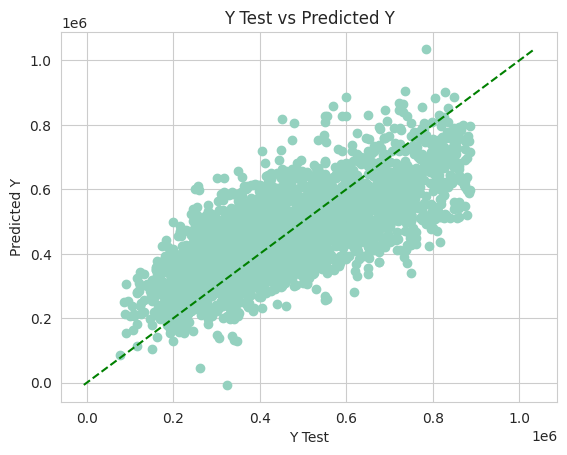

In [85]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Y Test vs Predicted Y')

# Adding the 45-degree line
min_val = min(min(y_test), min(predictions))
max_val = max(max(y_test), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'g--')
# Show the plot with both the scatter and the line
plt.show()

### Evaluating the Model

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
error_score = metrics.r2_score(y_test, predictions)
print(f"R squared Error :{error_score} ")

MAE: 95964.06329031105
MSE: 14110488591.494772
RMSE: 118787.5775975534
R squared Error :0.5467721271086897 


<ipython-input-87-b2c4efed73b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


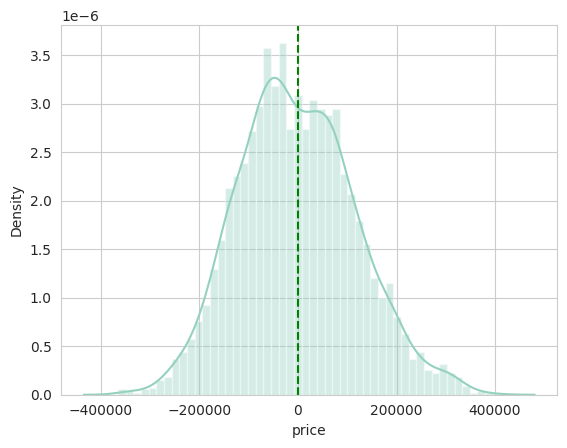

In [87]:
sns.distplot((y_test-predictions),bins=50);
plt.axvline(x=0, color='g', linestyle='--')
plt.show()

### Regression Model creation by means of statsmodels

In [88]:
X2_train = sm.add_constant(X_train)
X2_test = sm.add_constant(X_test)

In [89]:
model2 = sm.OLS(y_train, X2_train) # OLS for regression model

In [90]:
model2_ = model2.fit()

In [91]:
print(model2_.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     761.1
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:51:06   Log-Likelihood:            -1.8262e+05
No. Observations:               13926   AIC:                         3.653e+05
Df Residuals:                   13904   BIC:                         3.654e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.243e+07   2.31e+06     

### Scaling the data

In [92]:
scaler = StandardScaler()

In [93]:
num_col=data_cleaned.columns

In [94]:
data_cleaned_boolean = data_cleaned[boolean_columns]

In [95]:
data_cleaned_boolean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17408 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   View0        17408 non-null  int64
 1   View1        17408 non-null  int64
 2   View2        17408 non-null  int64
 3   View3        17408 non-null  int64
 4   View4        17408 non-null  int64
 5   Condition0   17408 non-null  int64
 6   Condition1   17408 non-null  int64
 7   Condition2   17408 non-null  int64
 8   Condition3   17408 non-null  int64
 9   Condition4   17408 non-null  int64
 10  waterfront0  17408 non-null  int64
 11  waterfront1  17408 non-null  int64
dtypes: int64(12)
memory usage: 1.7 MB


In [96]:
num_columns = [col for col in data_cleaned.columns if col not in boolean_columns]

In [97]:
data_cleaned_numerical = data_cleaned[num_columns]

In [98]:
new_data = pd.DataFrame(scaler.fit_transform(data_cleaned_numerical.values), columns= data_cleaned_numerical.columns) # rescale data

In [99]:
new_data = pd.merge(new_data,data_cleaned_boolean, left_index = True, right_index = True )

In [100]:
new_data

,sales_year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,...,View2,View3,View4,Condition0,Condition1,Condition2,Condition3,Condition4,waterfront0,waterfront1
0,-0.694107,-1.259375,-0.319559,-1.45272,-0.996829,-0.438966,-0.853231,-0.437006,-0.663551,-0.657518,...,0,0,0,0,0,1,0,0,1,0
1,-0.694107,0.537241,-0.319559,0.37038,1.040239,0.008327,0.993014,-0.437006,0.875132,0.380986,...,0,0,0,0,0,1,0,0,1,0
2,1.440701,-1.497522,-1.423742,-1.45272,-1.597690,0.783223,-0.853231,-1.523003,-1.300784,-0.657518,...,0,0,0,0,0,1,0,0,1,0
3,-0.694107,0.912364,0.784625,1.46424,0.146274,-0.621592,-0.853231,-0.437006,-0.865601,1.705079,...,0,0,0,0,0,0,0,1,1,0
4,1.440701,0.378097,-0.319559,0.00576,-0.264071,0.243774,-0.853231,0.648990,0.113561,-0.657518,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17403,-0.694107,-0.474457,-0.319559,0.73500,-0.483898,-1.708638,2.839259,0.648990,-0.119572,-0.657518,...,0,0,0,0,0,1,0,0,1,0
17404,1.440701,-0.247109,0.784625,0.73500,0.659205,-0.393169,0.993014,0.648990,1.092723,-0.657518,...,0,0,0,0,1,0,0,0,1,0
17405,-0.694107,-0.235168,-1.423742,-1.81734,-1.231311,-1.647107,0.993014,-0.437006,-0.912227,-0.657518,...,0,0,0,0,0,1,0,0,1,0
17406,1.440701,-0.247109,-0.319559,0.73500,-0.381312,-1.355468,0.993014,0.648990,-0.010777,-0.657518,...,0,0,0,0,0,0,0,1,1,0


In [101]:
Y_new = new_data['price']
X_new = new_data.drop(['price'],axis=1)

In [102]:
from sklearn.model_selection import train_test_split
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=10)

In [103]:
lm = LinearRegression()
lm.fit(X_new_train,y_new_train)

LinearRegression()

In [104]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.02857659 -0.06598941  0.07841745  0.14874923 -0.06141388  0.07985865
  0.44989039  0.082059    0.12644353  0.19530013 -0.10605136  0.42886637
 -0.01652049  0.07071925  0.00052785  0.1063473   0.05762058 -0.23521498
  0.08313937 -0.03151712 -0.01412319 -0.03347379 -0.00402528 -0.16424012
  0.16424012]


In [105]:
predictions = lm.predict( X_new_test)

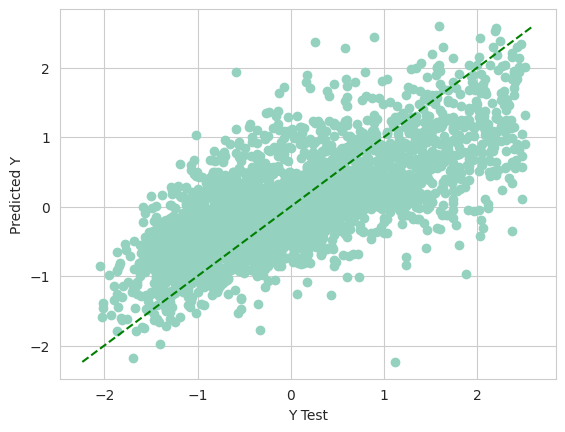

In [106]:
plt.scatter(y_new_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

min_val = min(min(y_new_test), min(predictions))
max_val = max(max(y_new_test), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'g--')
plt.show()

In [107]:
print('MAE:', metrics.mean_absolute_error(y_new_test, predictions))
print('MSE:', metrics.mean_squared_error(y_new_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_new_test, predictions)))
error_score = metrics.r2_score(y_new_test, predictions)
print(f"R squared Error :{error_score} ")

MAE: 0.5650916364345298
MSE: 0.5037178817947031
RMSE: 0.709730851657657
R squared Error :0.5094885626753034 


### As the next steps can be considered outliers exclusion in addition and after it to exclude the not significant variables from the models

### Random Forest: Import Random Forest Regressor

In [108]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

RandomForestRegressor()

In [109]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [110]:
# Model Evaluation
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('R squared Error :',metrics.r2_score(y_train, y_pred))

MAE: 31977.6887531852
MSE: 1714118204.6853895
RMSE: 41401.91064051742
R squared Error : 0.9445454693933623


### Random Forest: Visualizing the differences between actual prices and predicted values

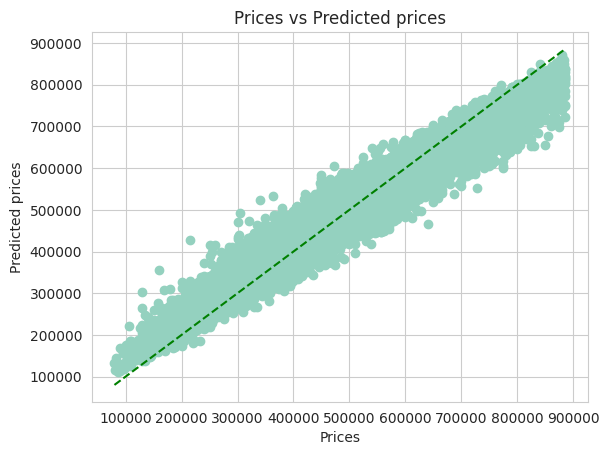

In [111]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

# Adding the 45-degree line
min_val = min(min(y_train), min(y_pred))
max_val = max(max(y_train), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'g--')
# Show the plot with both the scatter and the line
plt.show()

### Random Forest: Checking residuals

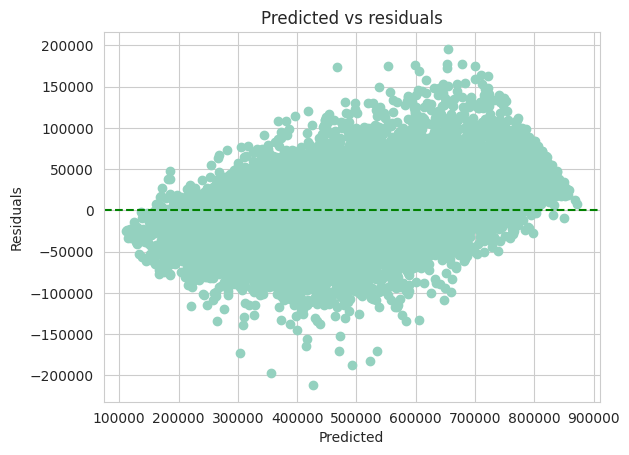

In [112]:
# Checking residuals
plt.scatter(y_pred, y_train - y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

# Adding the horizontal line at y=0
plt.axhline(y=0, color='g', linestyle='--')
# Show the plot
plt.show()